# London Housing Data Analysis


In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [76]:
df = pd.read_csv('housing.csv')

In [77]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [78]:
df['date'] = pd.to_datetime(df['date'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  int64         
 3   code           13549 non-null  object        
 4   houses_sold    13455 non-null  float64       
 5   no_of_crimes   7439 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 635.2+ KB


In [80]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [81]:
df

,date,area,average_price,code,houses_sold,no_of_crimes,year,month
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995,2
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995,3
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995,4
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995,5
...,...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,2019,9
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,2019,10
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,2019,11
13547,2019-12-01,england,250410,E92000001,NaN,NaN,2019,12


In [82]:
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

In [83]:
# Replace numeric month values with month names
df['month'] = df['month'].map(month_map)
# df['month'] = df['month'].replace(month_map)
df

,date,area,average_price,code,houses_sold,no_of_crimes,year,month
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995,Jan
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995,Feb
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995,Mar
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995,Apr
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995,May
...,...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,2019,Sep
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,2019,Oct
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,2019,Nov
13547,2019-12-01,england,250410,E92000001,NaN,NaN,2019,Dec


In [14]:
df.shape

(13549, 8)

In [86]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
year                0
month               0
dtype: int64

In [87]:
df.dropna(inplace =True)

In [88]:
df.isnull().sum()

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
year             0
month            0
dtype: int64

In [31]:
df1 = df.groupby('area')['average_price'].mean().round(2).sort_values(ascending = False).head(5)

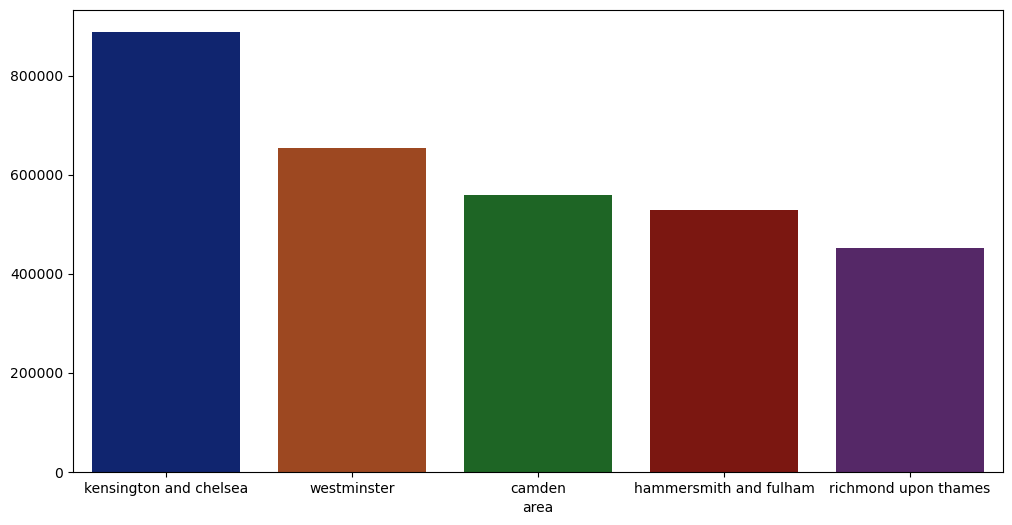

In [89]:
plt.figure(figsize = (12,6))
sns.barplot(x = df1.index, y = df1.values, palette = 'dark')
plt.show()

In [37]:
df2 = df.groupby('area')['houses_sold'].sum().sort_values(ascending = False).head(5)
df2

area
wandsworth    118608.0
bromley       110245.0
croydon       105603.0
barnet         95739.0
lambeth        86528.0
Name: houses_sold, dtype: float64

Text(0, 0.5, '')

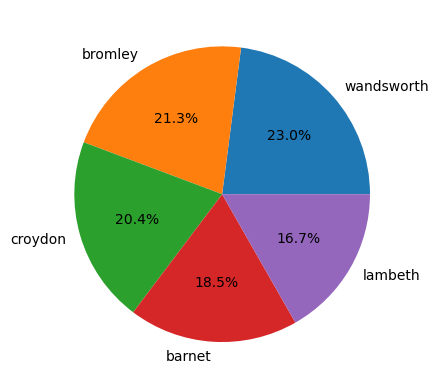

In [43]:
df2.plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel(None)

In [84]:
df3 = df.groupby('year')['houses_sold'].sum().sort_values(ascending = False).head(6)
df3

year
2002    2875300.0
2006    2841060.0
2007    2727506.0
2004    2712216.0
2001    2661822.0
2003    2653878.0
Name: houses_sold, dtype: float64

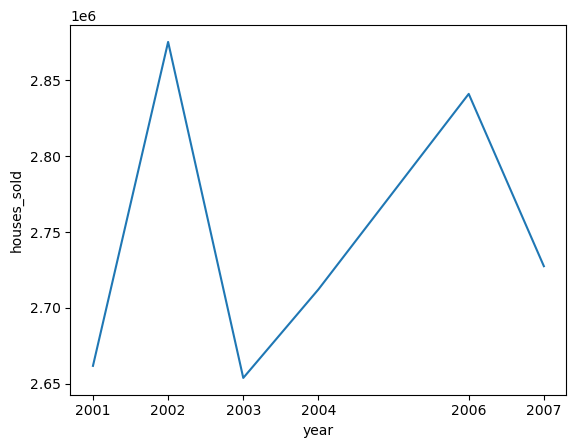

In [85]:
sns.lineplot(df3)
plt.xticks(df3.index)
plt.show()

In [149]:
df4 = df.groupby('month')['houses_sold'].sum().sort_values(ascending = False)
df4

month
Jul    219554.0
Aug    218148.0
Jun    202236.0
Sep    199751.0
Oct    198906.0
Nov    191828.0
Mar    190657.0
May    184335.0
Dec    179831.0
Apr    169195.0
Jan    159053.0
Feb    156295.0
Name: houses_sold, dtype: float64

<Axes: xlabel='houses_sold', ylabel='Density'>

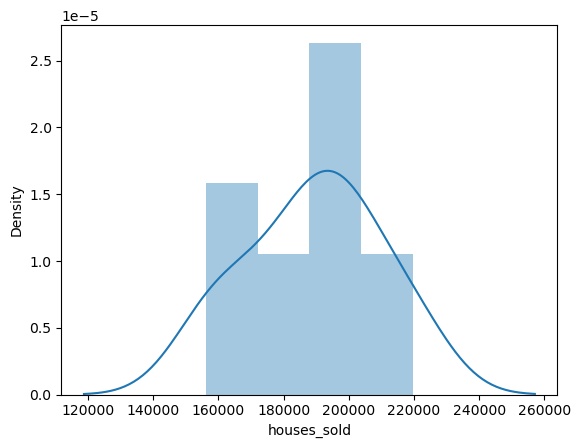

In [150]:
sns.distplot(df4)

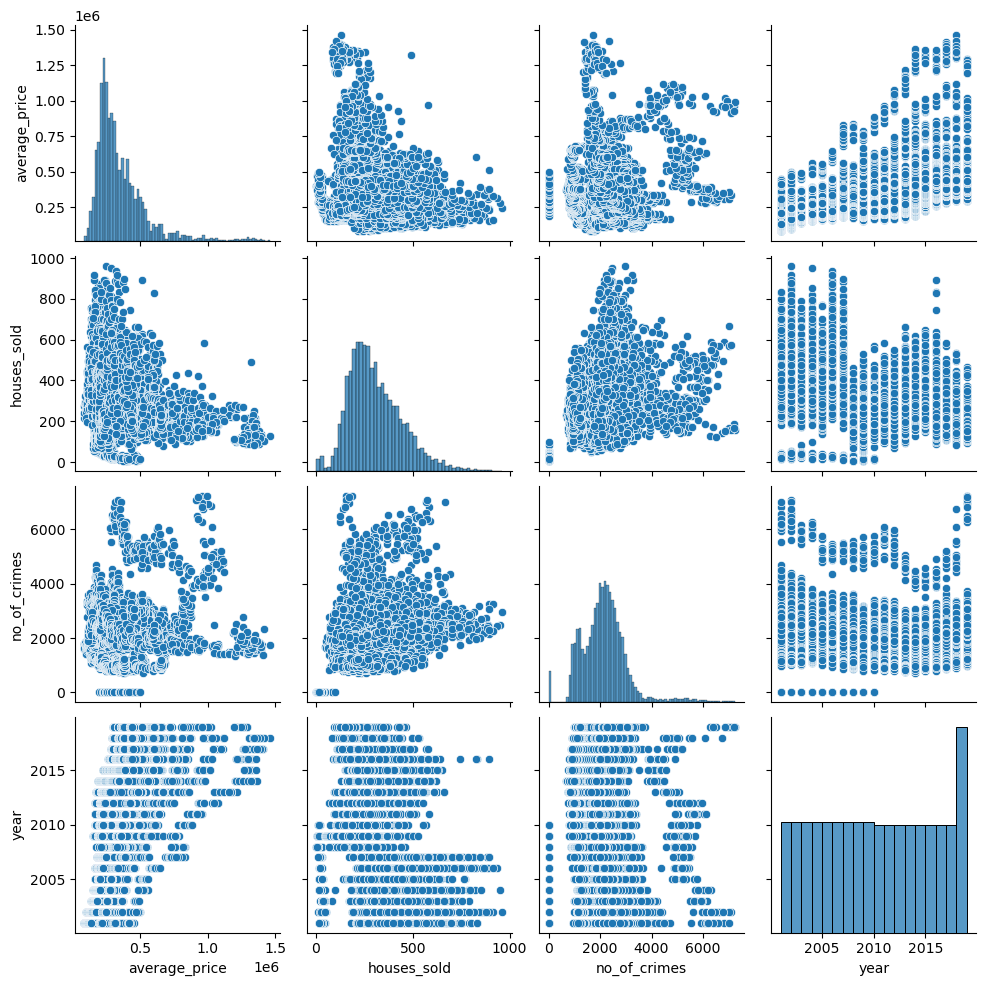

In [122]:
sns.pairplot(df)
plt.show()

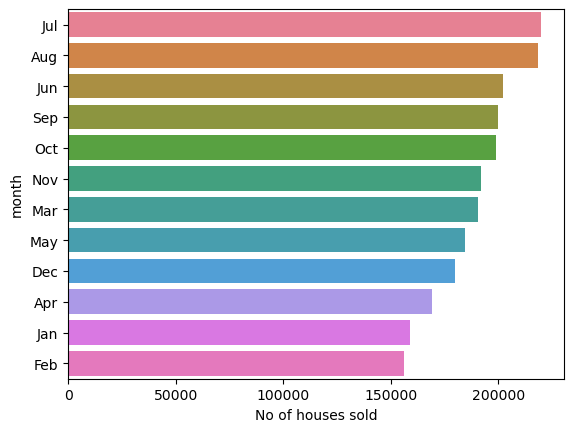

In [162]:
sns.barplot(y = df4.index, x = df4.values, palette = 'husl')
plt.xlabel('No of houses sold')
plt.show()